In [1]:
cd ..

/home/dmitrii/arithmia_project/training_pipeline/JET_detection


In [2]:
import pandas as pd
import numpy as np
from biosppy.signals.ecg import christov_segmenter

import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

from data_generator import Preprocessing
from utils.peak_finder import Peak_finder

peak_finder = Peak_finder()
prep = Preprocessing(aug=False)
from models.resnet import Model

/home/dmitrii/arithmia_project/training_pipeline/JET_detection/models/resnet_pre_trained/model_config.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  hparams = yaml.load(open(f"{os.path.dirname(os.path.abspath(__file__))}/hparams.yml"))
/home/dmitrii/arithmia_project/training_pipeline/JET_detection/models/resnet/model_config.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  hparams = yaml.load(open(f"{os.path.dirname(os.path.abspath(__file__))}/hparams.yml"))


In [21]:
DEBUG_PATH = './data/CV_debug/'
DATA_PATH = './data/JET_data/processed_data/'

patients = [i for i in os.listdir(DEBUG_PATH) if i.find('.')==-1]

print(f'Total number of patients: {len(patients)}')

records = []

for patient in patients:
    
    record = [patient+'/'+i[:-4] for i in os.listdir(DATA_PATH+patient) if i.find('.npy')!=-1]
    
    records+=record
    
print(f'Total number of records {len(records)}')

# model_name = ''

# model = Model()

Total number of patients: 3
Total number of records 881


In [26]:
preds = []
error = []
labels = []
signals = []

for record in records:
    ann = json.load(open(DEBUG_PATH+record+'.json'))
    error.append(ann['error'])
    preds.append(ann['prediction'])
    labels.append(json.load(open(DATA_PATH+record+'.json'))['label'][0])
    signals.append(np.load(DATA_PATH+record+'.npy'))
                 
                 
error = np.array(error)
preds = np.array(preds)
labels = np.array(labels)
signals = np.array(signals)
records = np.array(records)

In [23]:
labels = np.eye(4, dtype=np.float32)[labels.astype(np.int8)]


inds = error.argsort()
labels = labels[inds[::-1],:]
signals = signals[inds[::-1],:]
records = records[inds[::-1]]
preds = preds[inds[::-1]]

N = 10

#select top best
labels_best = labels[-N:,:].copy()
signals_best = signals[-N:,:]
records_best = records[-N:]
preds_best = preds[-N:]

#select top worst
labels_worst = labels[:N,:].copy()
signals_worst = signals[:N,:].copy()
records_worst = records[:N]
preds_worst = preds[:N]

# Plots

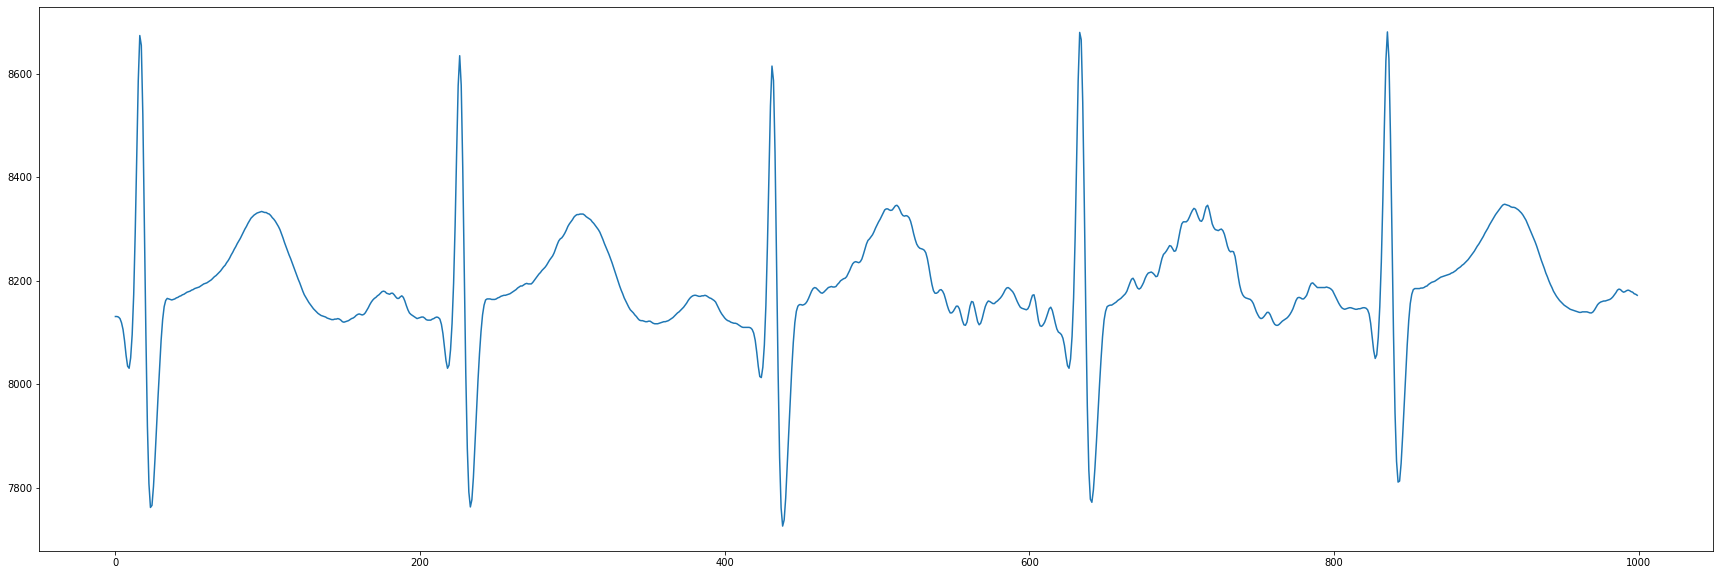

In [29]:
signal = np.load(DATA_PATH+'2717090/271'+'.npy')

fig = plt.figure(figsize=(30,10))
plt.plot(signal[1000:2000])
plt.show()



# Worst

2717090/226


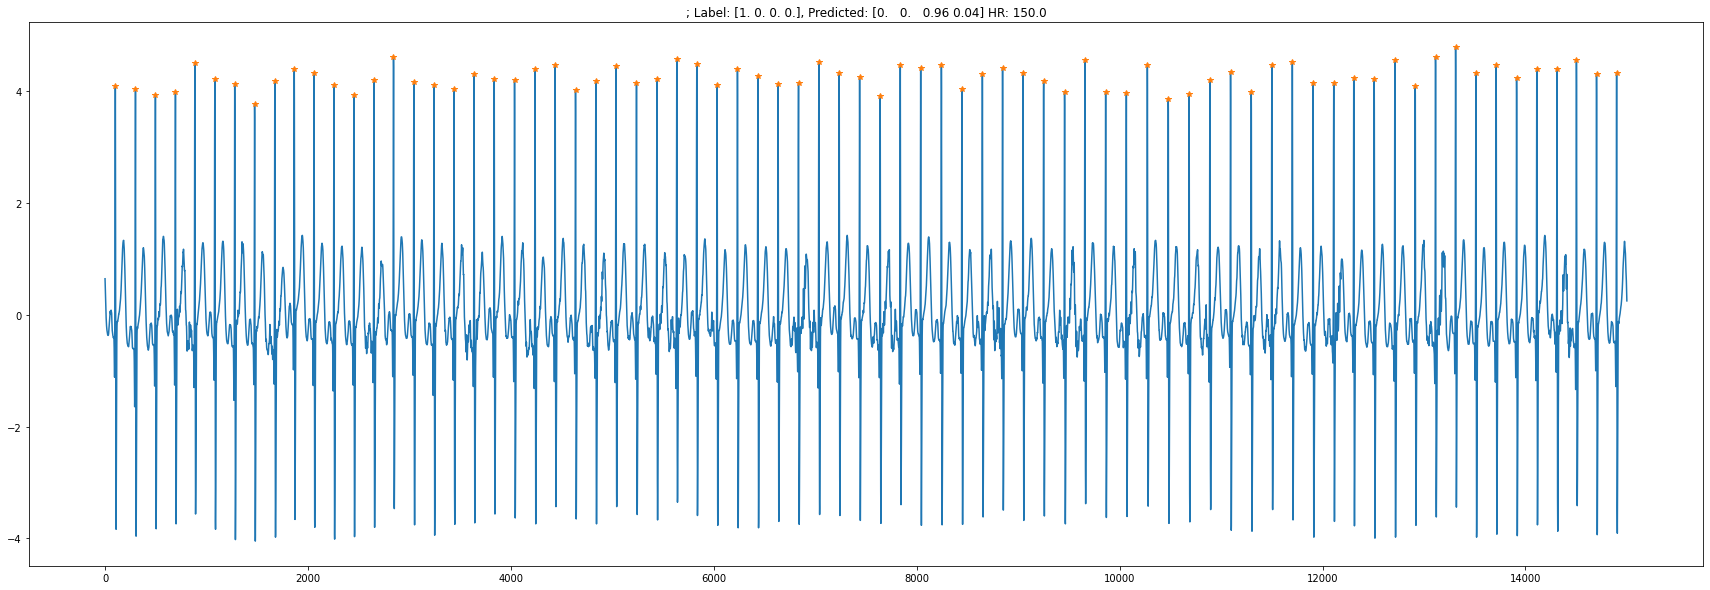

2717090/246


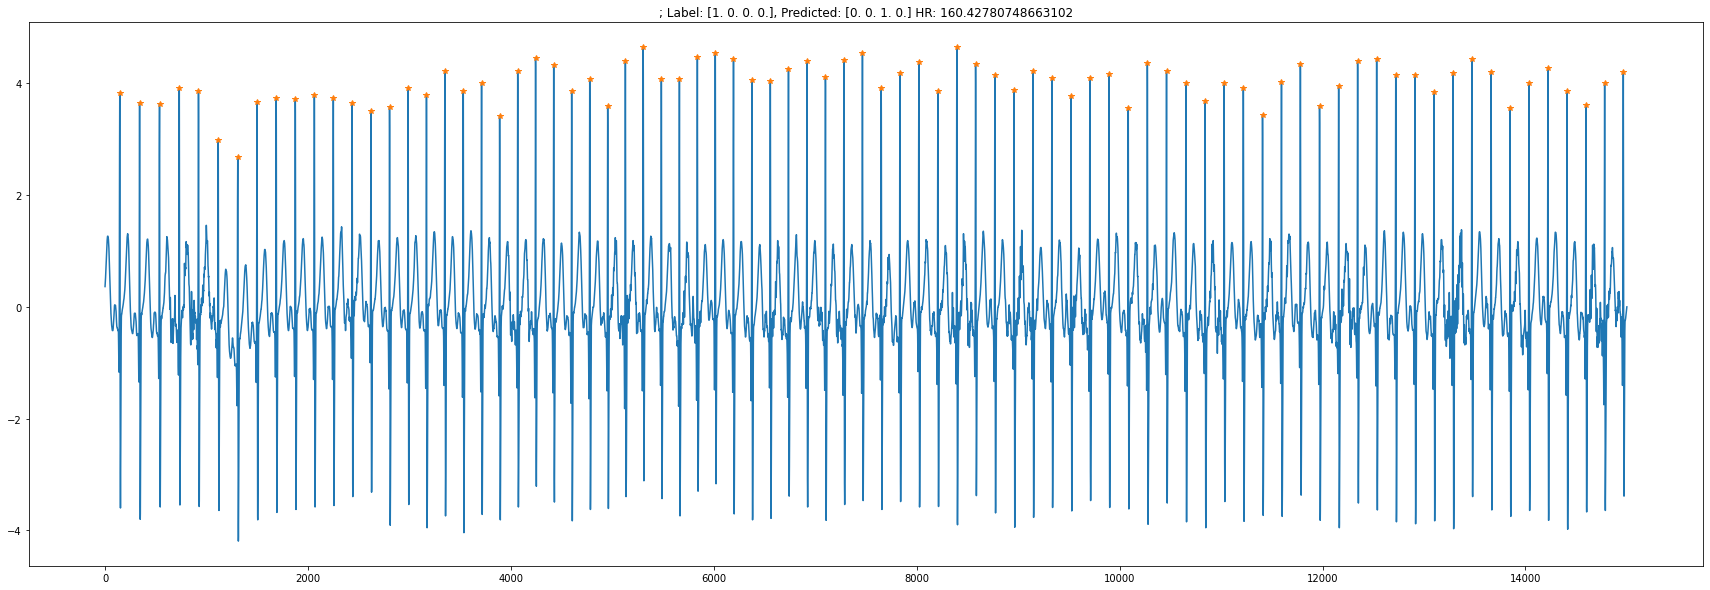

2717090/269


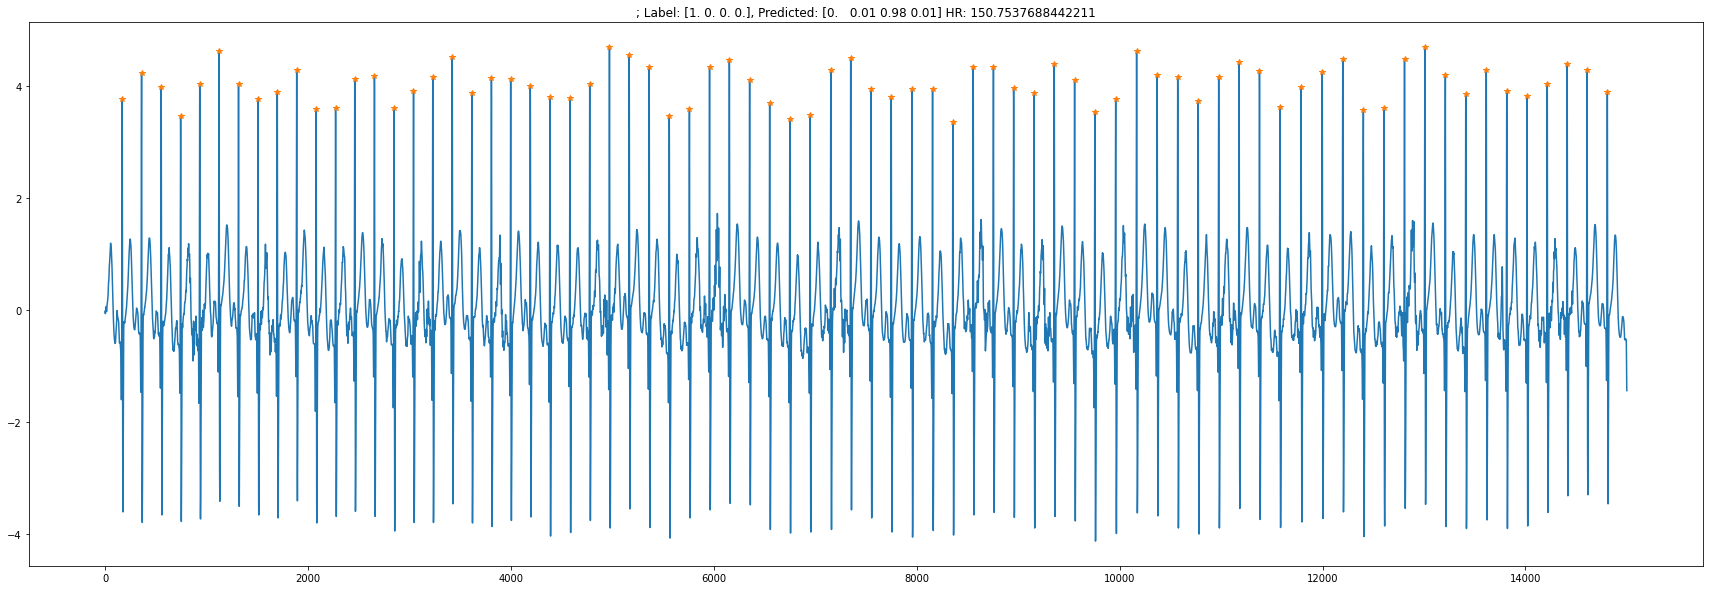

2717090/256


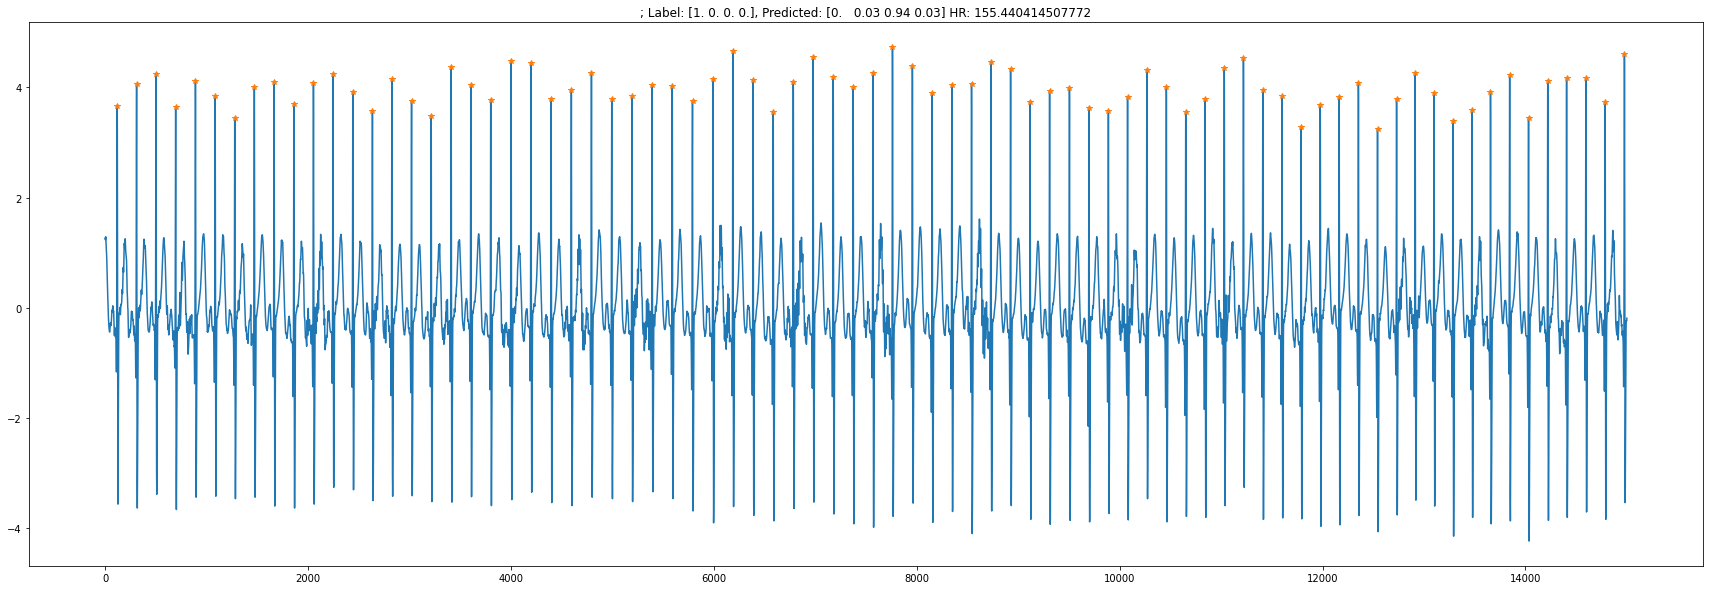

2717090/108


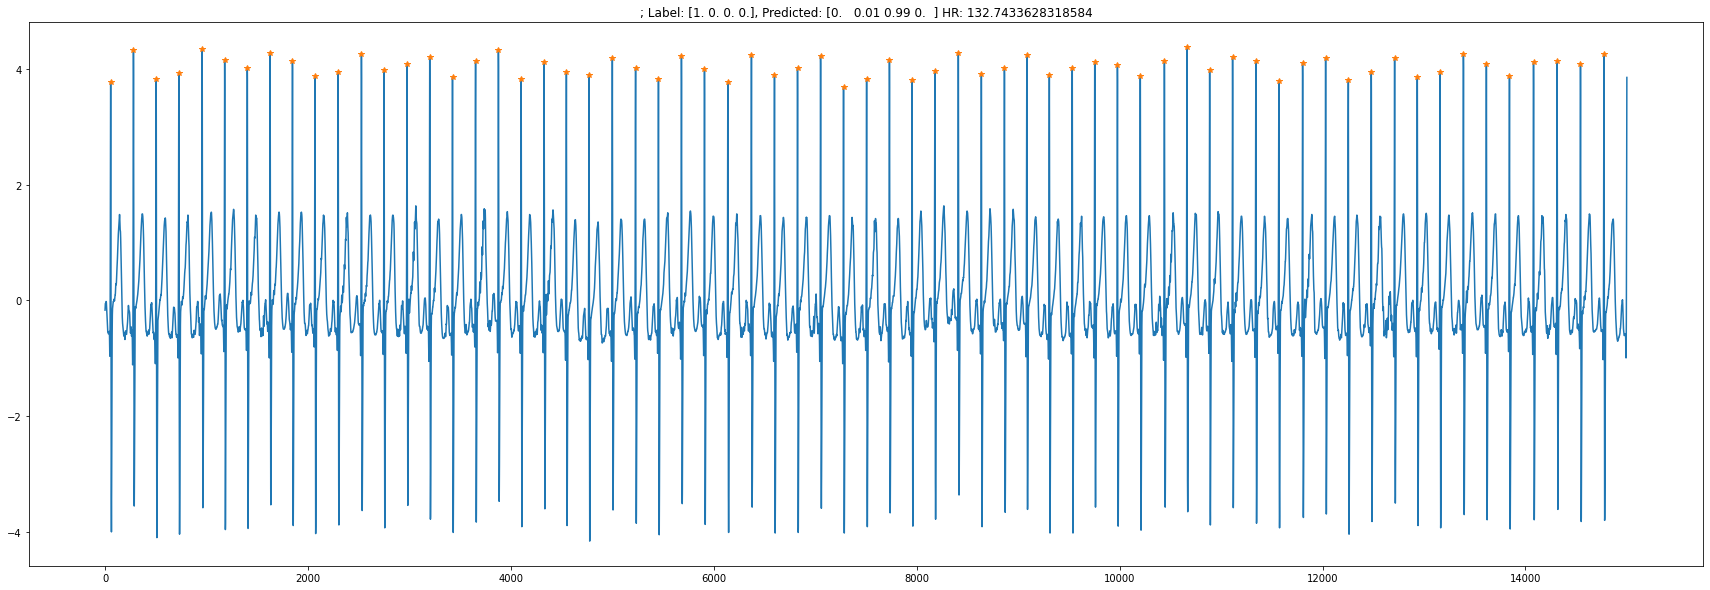

2717090/46


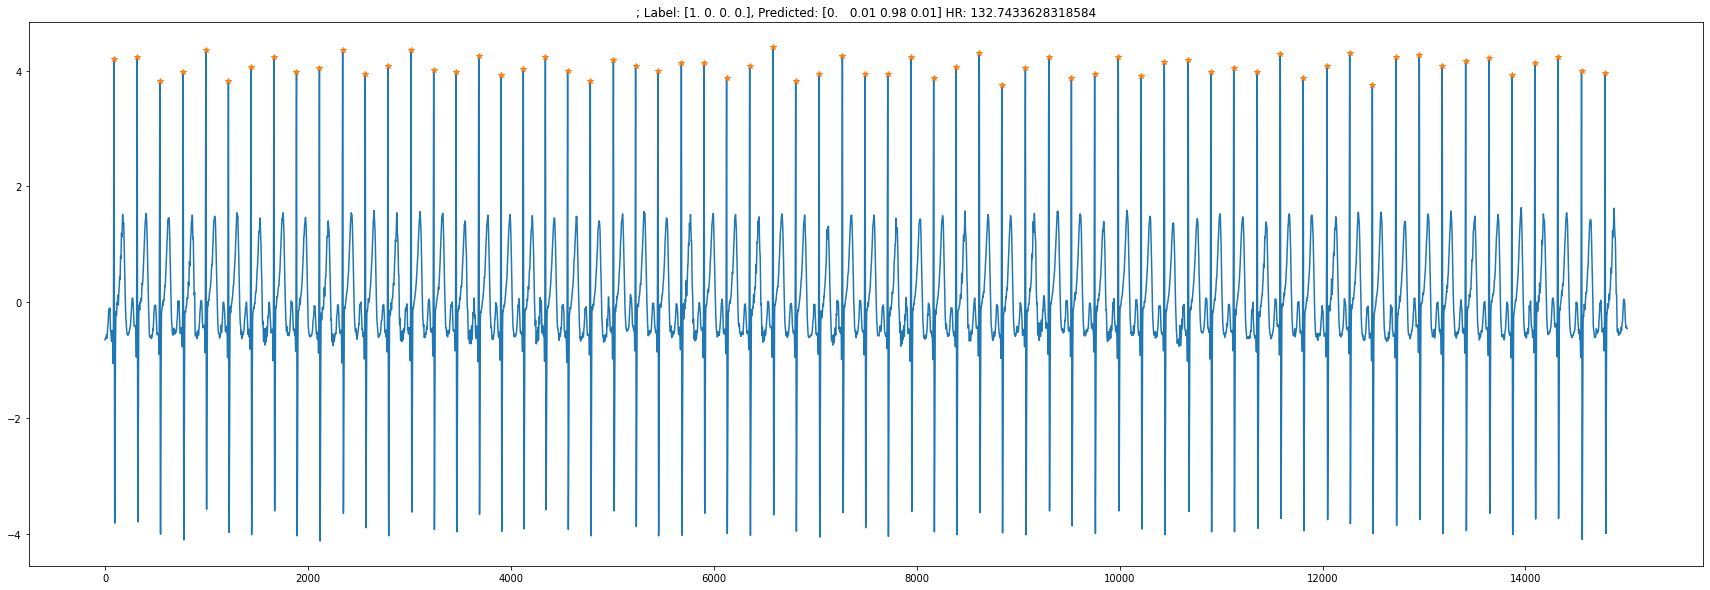

2717090/225


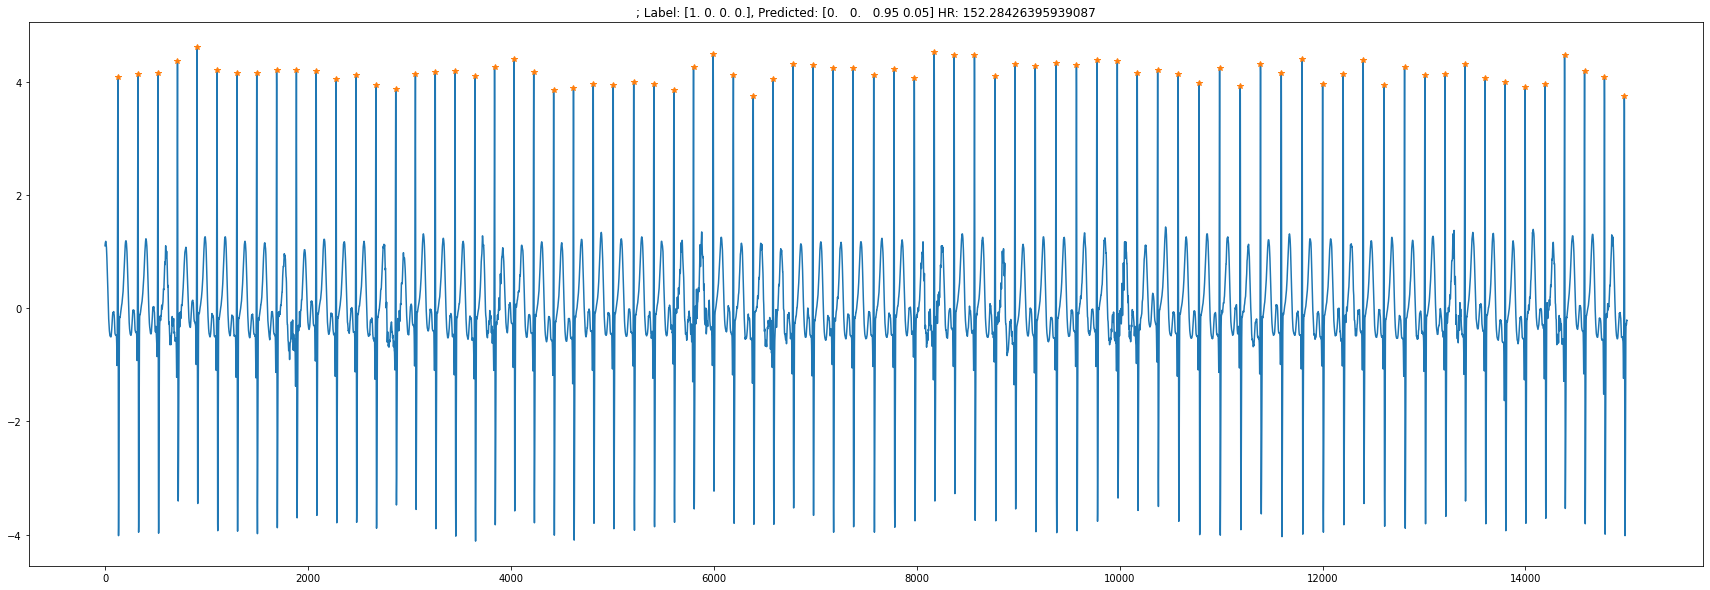

2717090/91


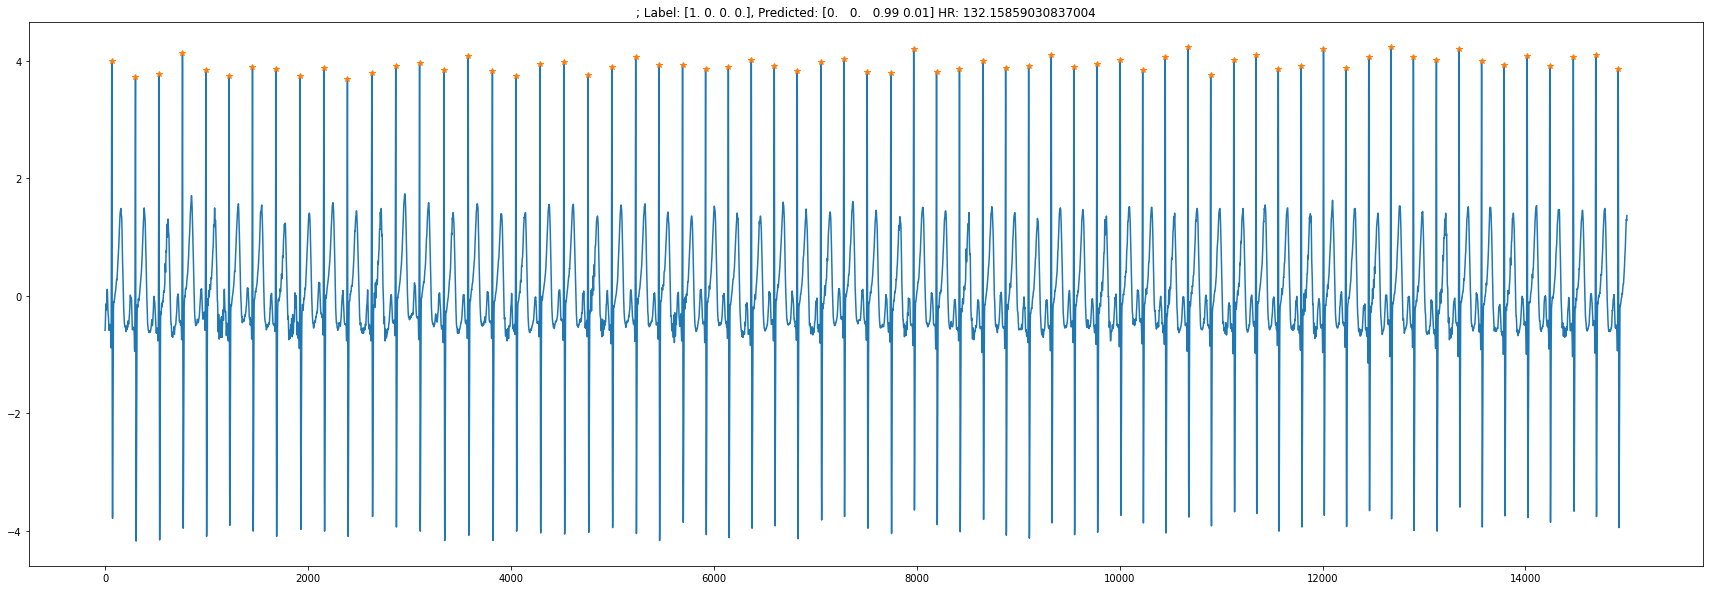

2717090/271


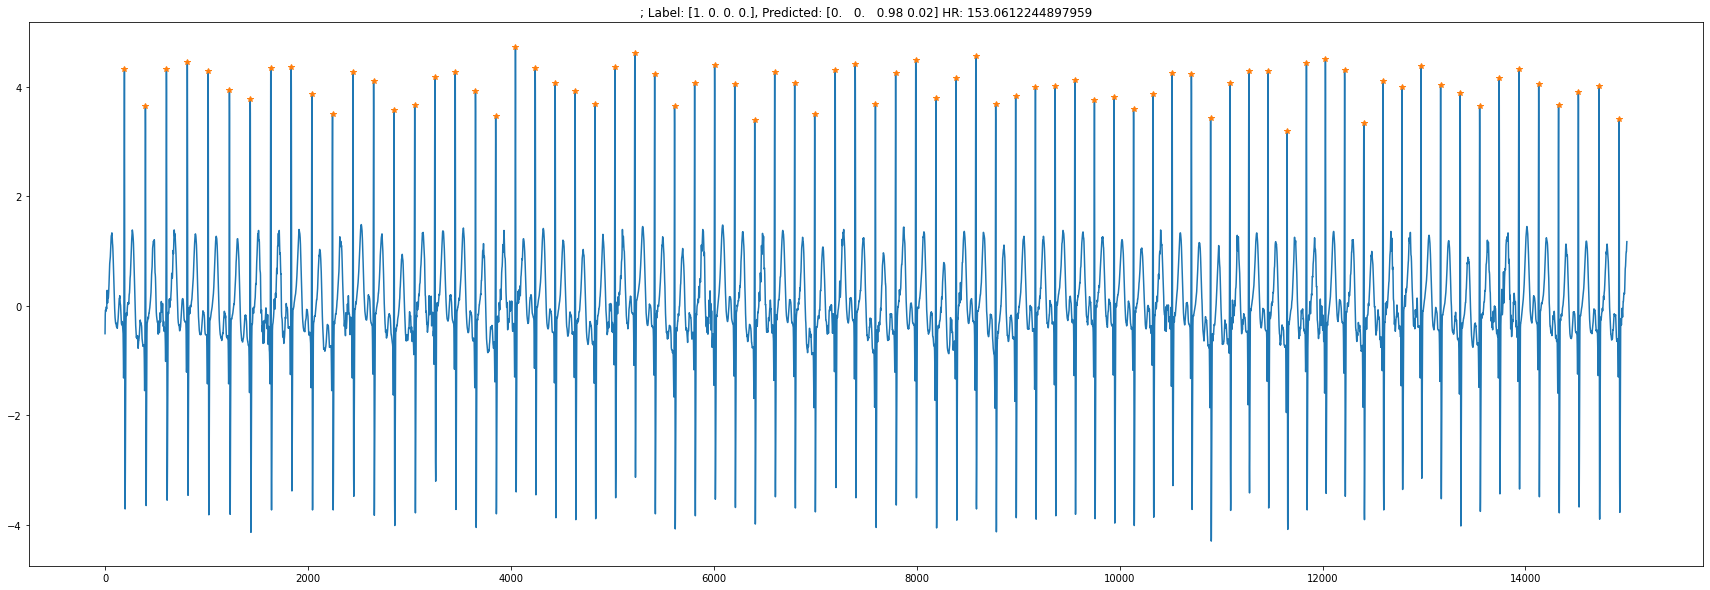

2717090/45


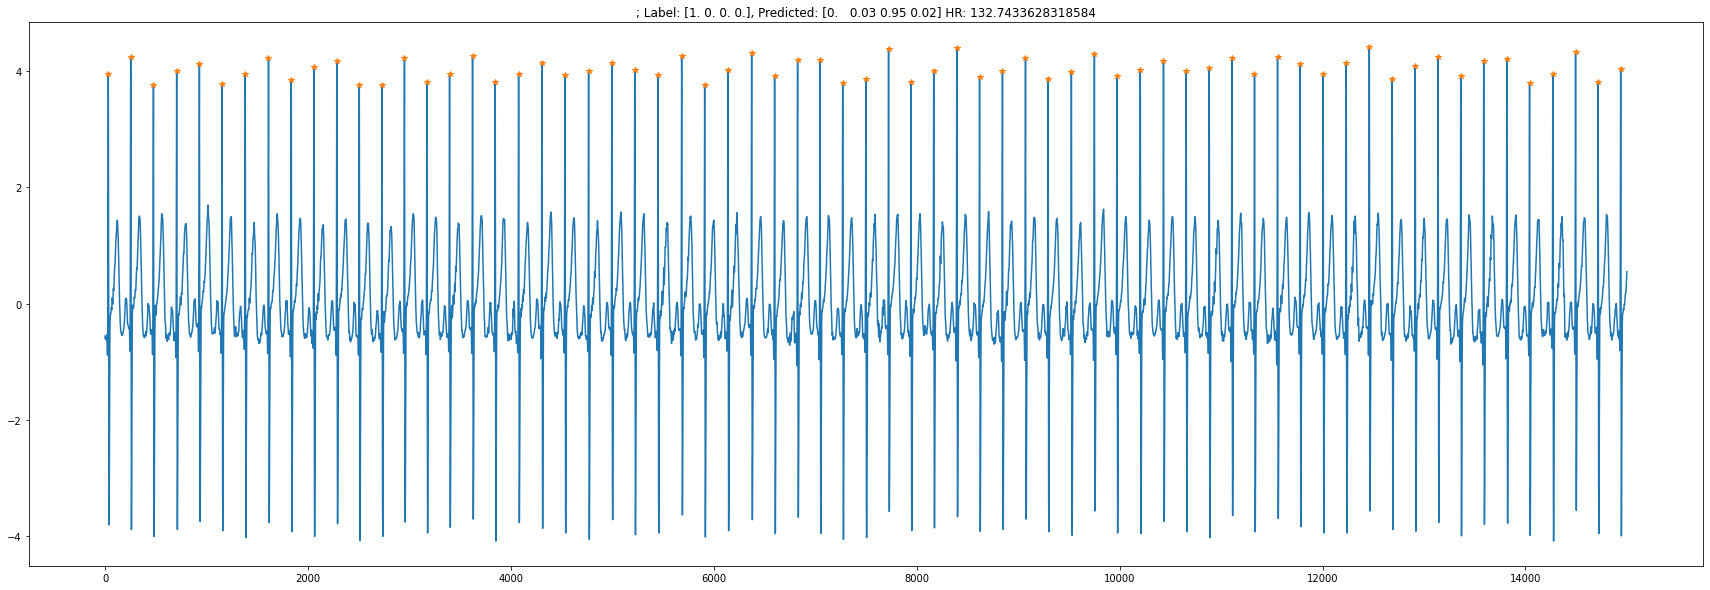

In [27]:
for i in range(N):
    
    #apply preprocessing
    signal = prep.run(signals_worst[i],np.array([1]),label_process=False)
    signal = signal.reshape(-1)
    
    #find heart rate
    rr = peak_finder.find_peaks_abp(signal, threshold=4)  #christov_segmenter(signal=signals_worst[i], sampling_rate=125)
    if rr.shape[0]>5:
        HR = np.median(np.diff(rr))
        HR = 60/(HR/500)
    else:
        HR = -1
    
    
    
    fig = plt.figure(figsize=(30,10))
    plt.plot(signal)
    plt.plot(rr,signal[rr],'*')
    plt.title(f'; Label: {labels_worst[i,:]}, Predicted: {np.round(preds_worst[i,:],2)} HR: {HR}')
    print(records_worst[i])
    plt.show()
    
    

## Best

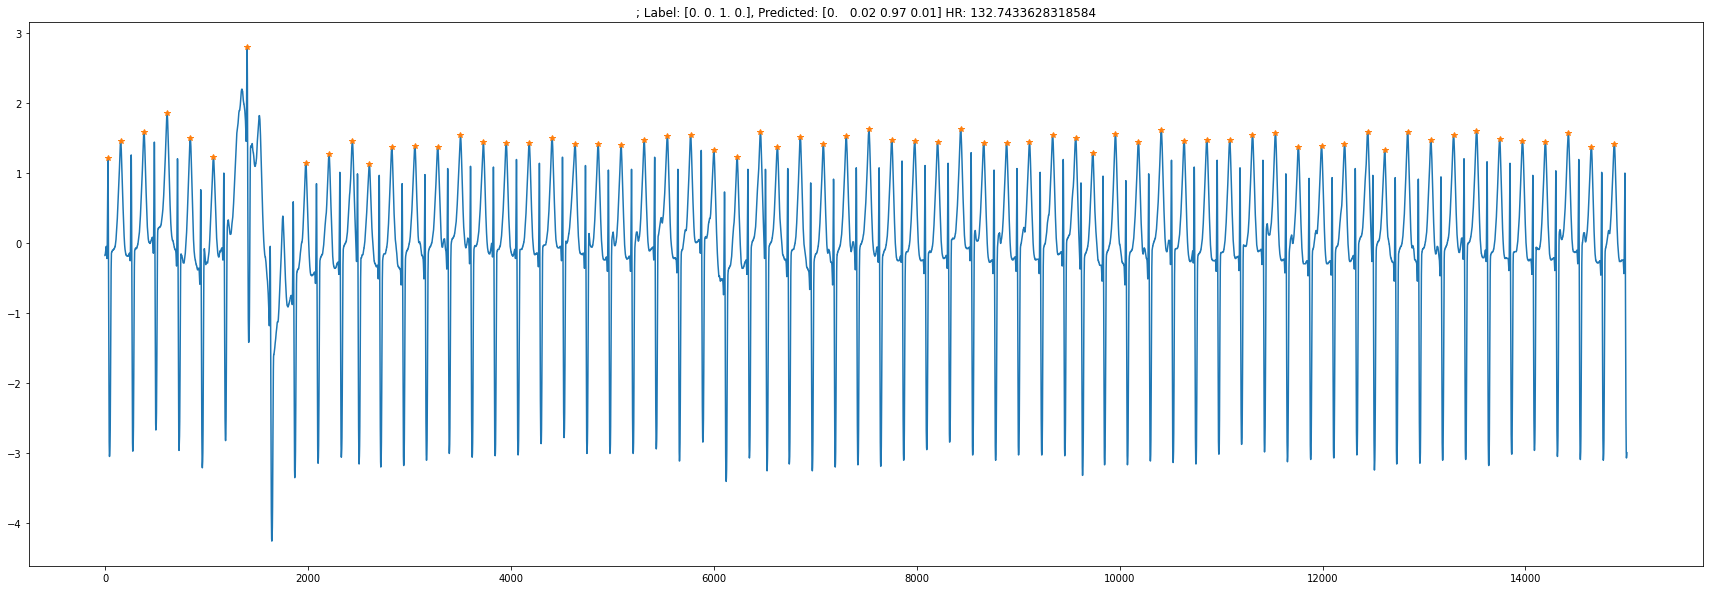

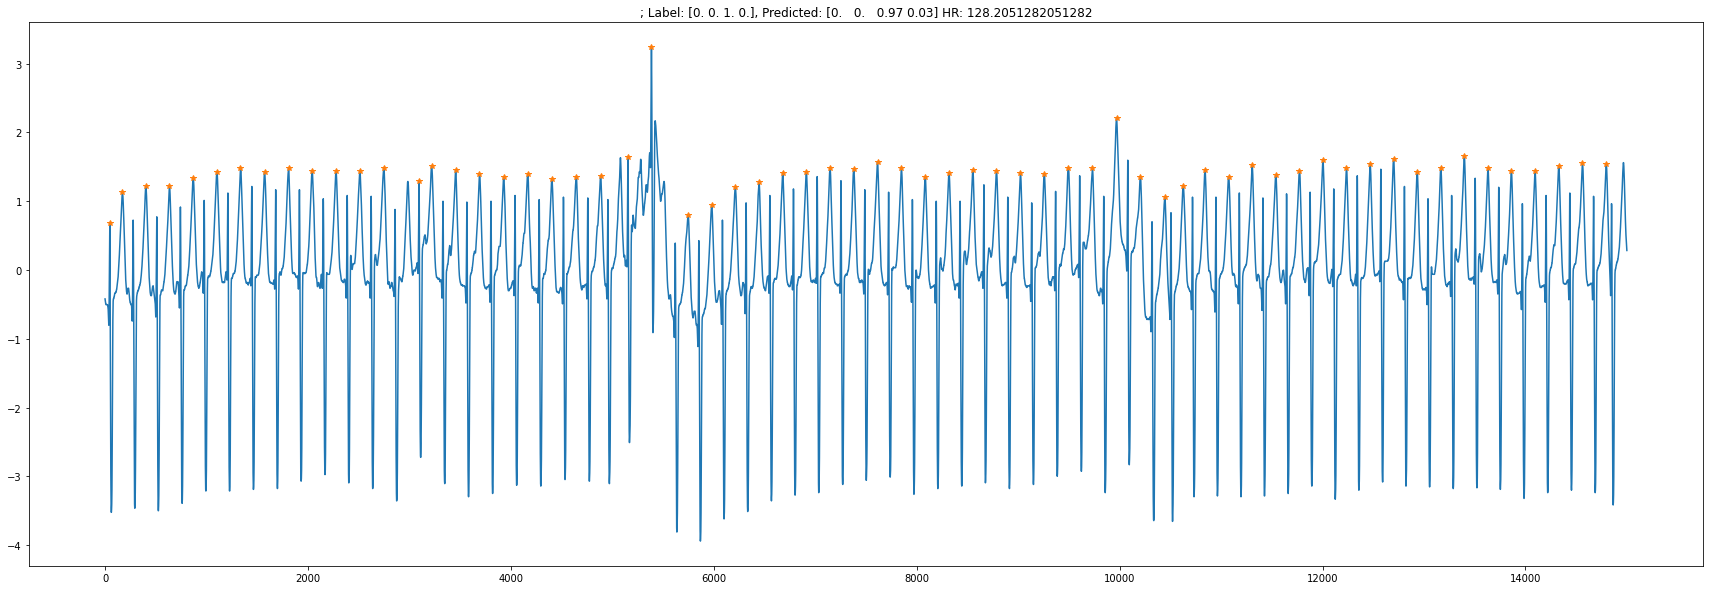

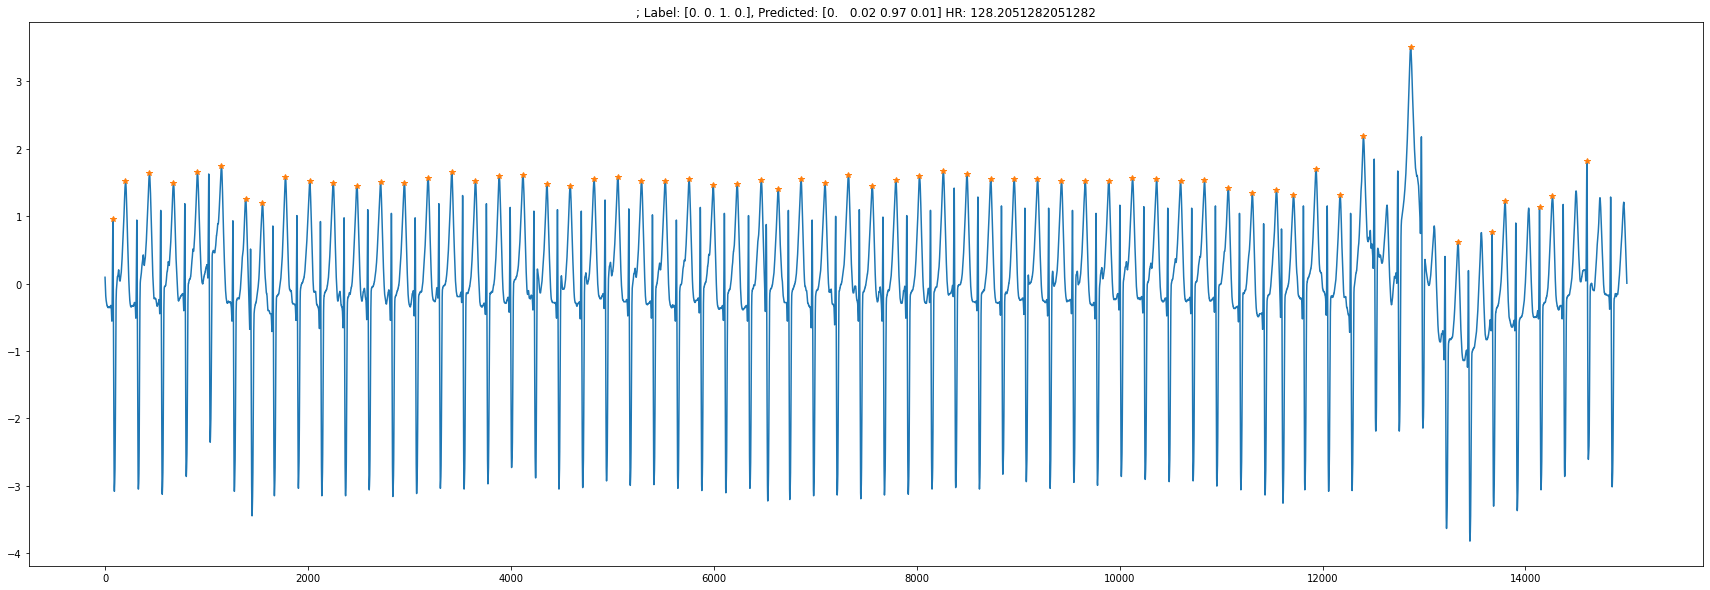

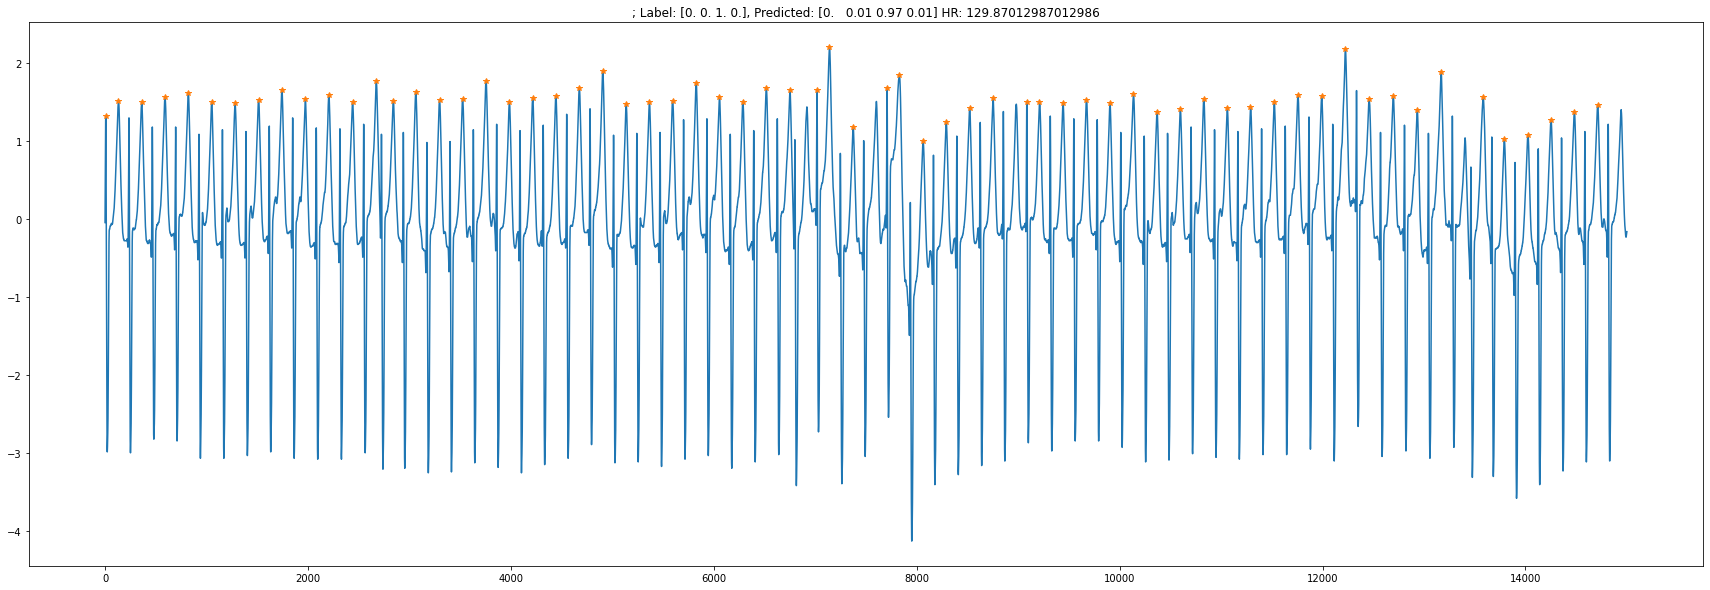

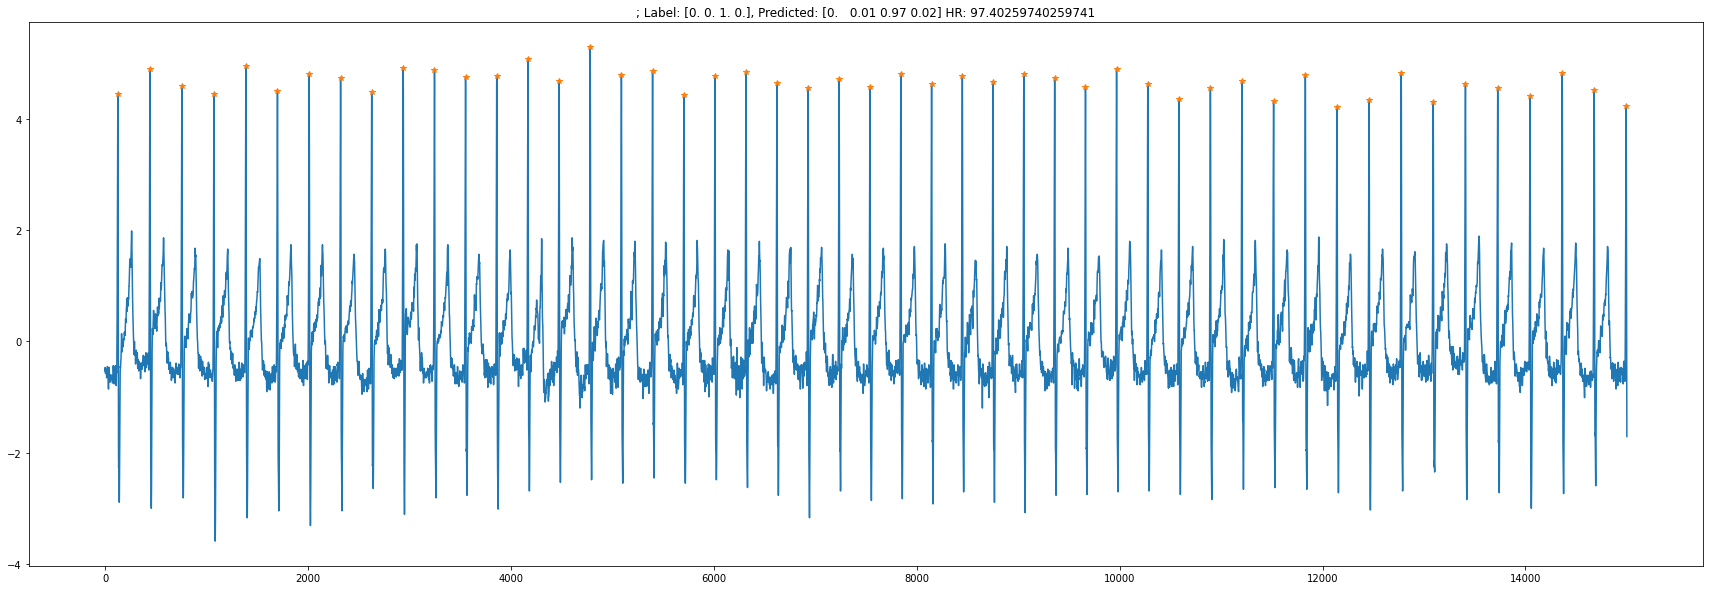

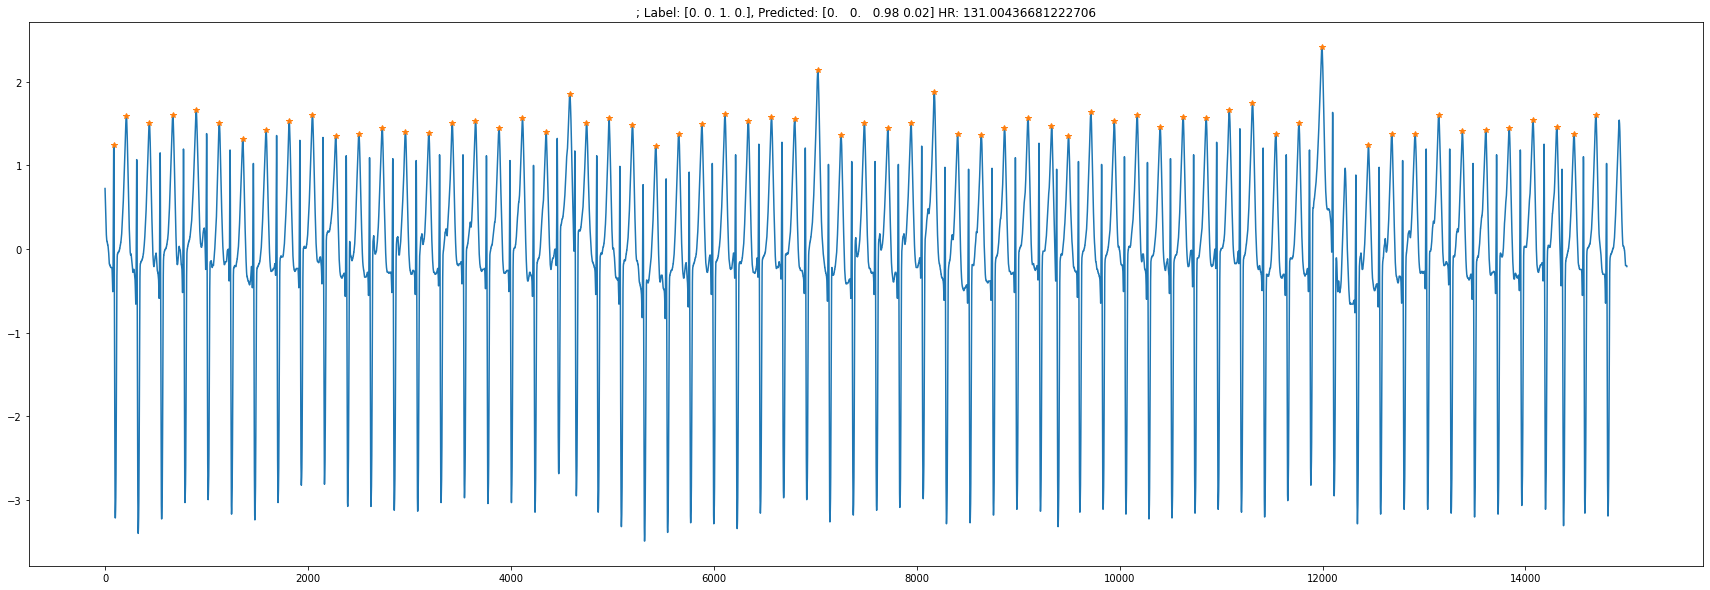

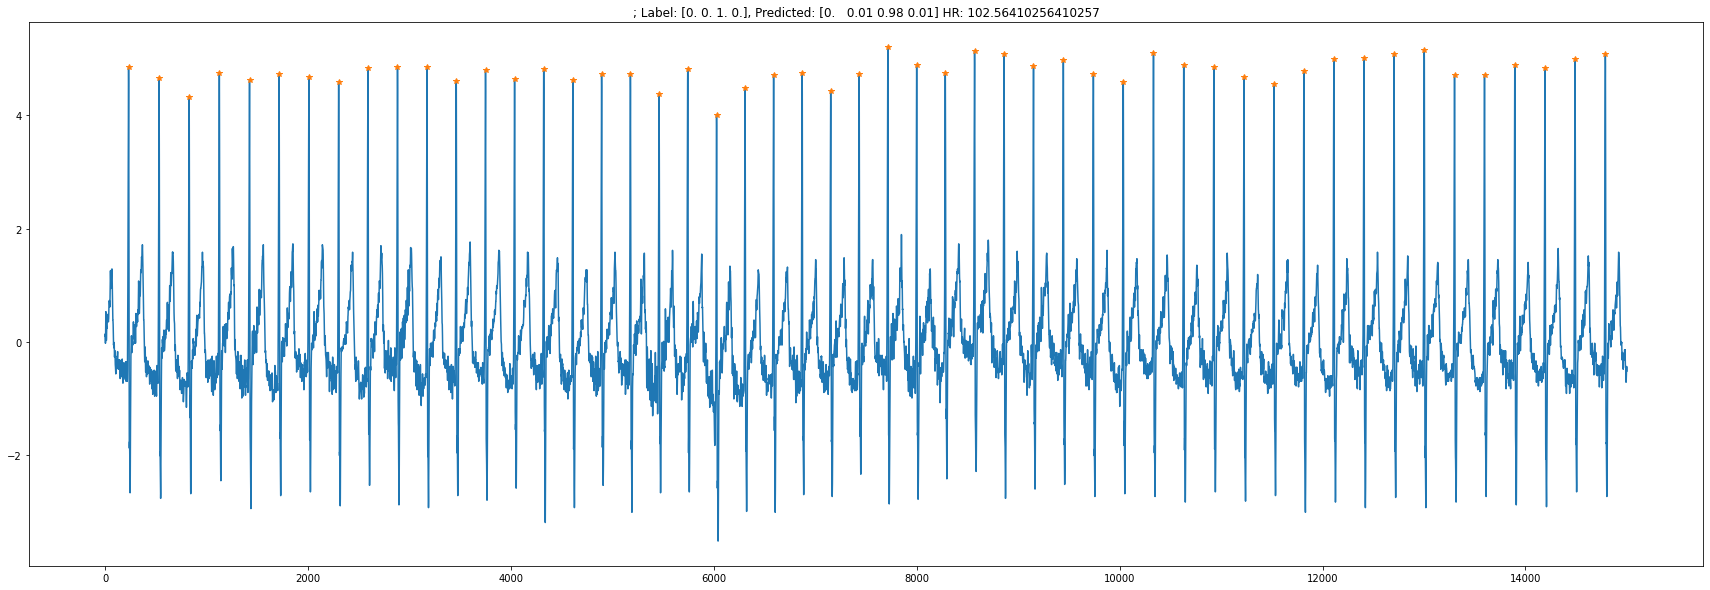

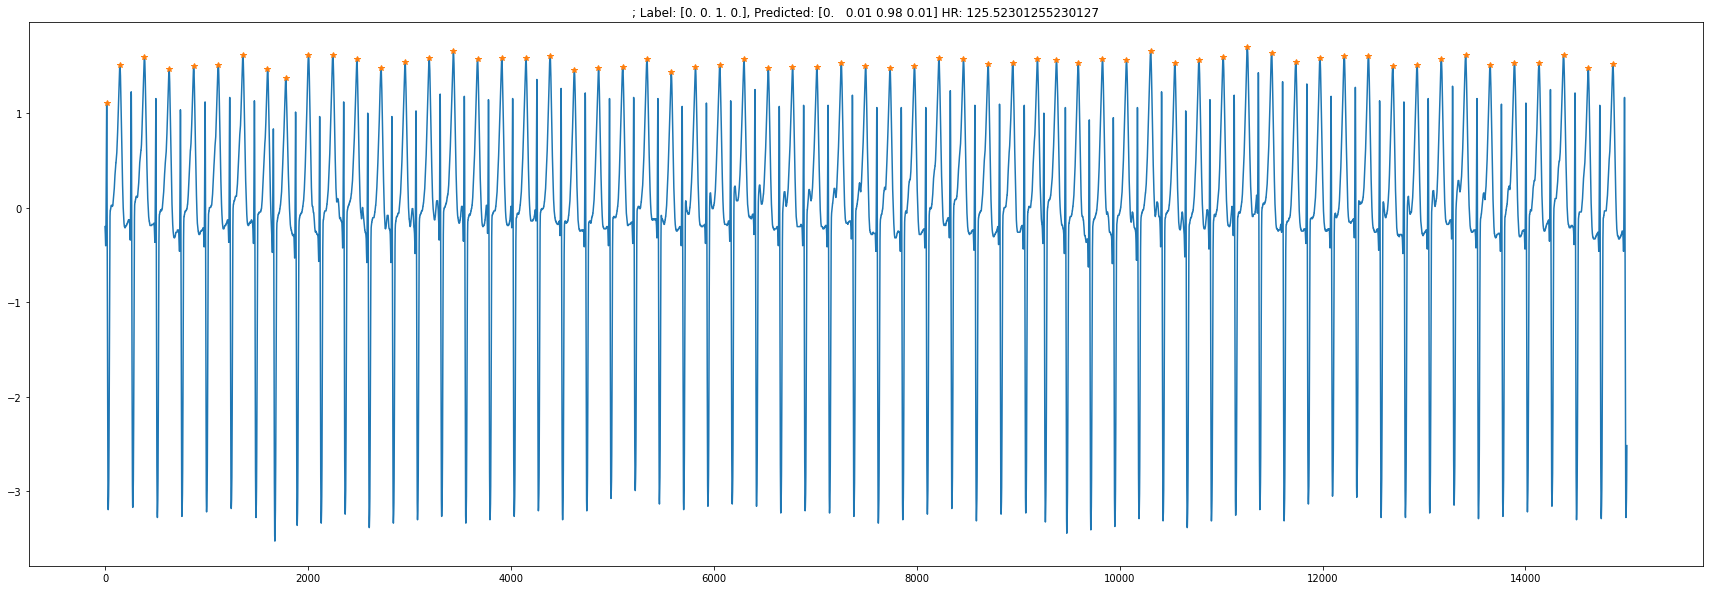

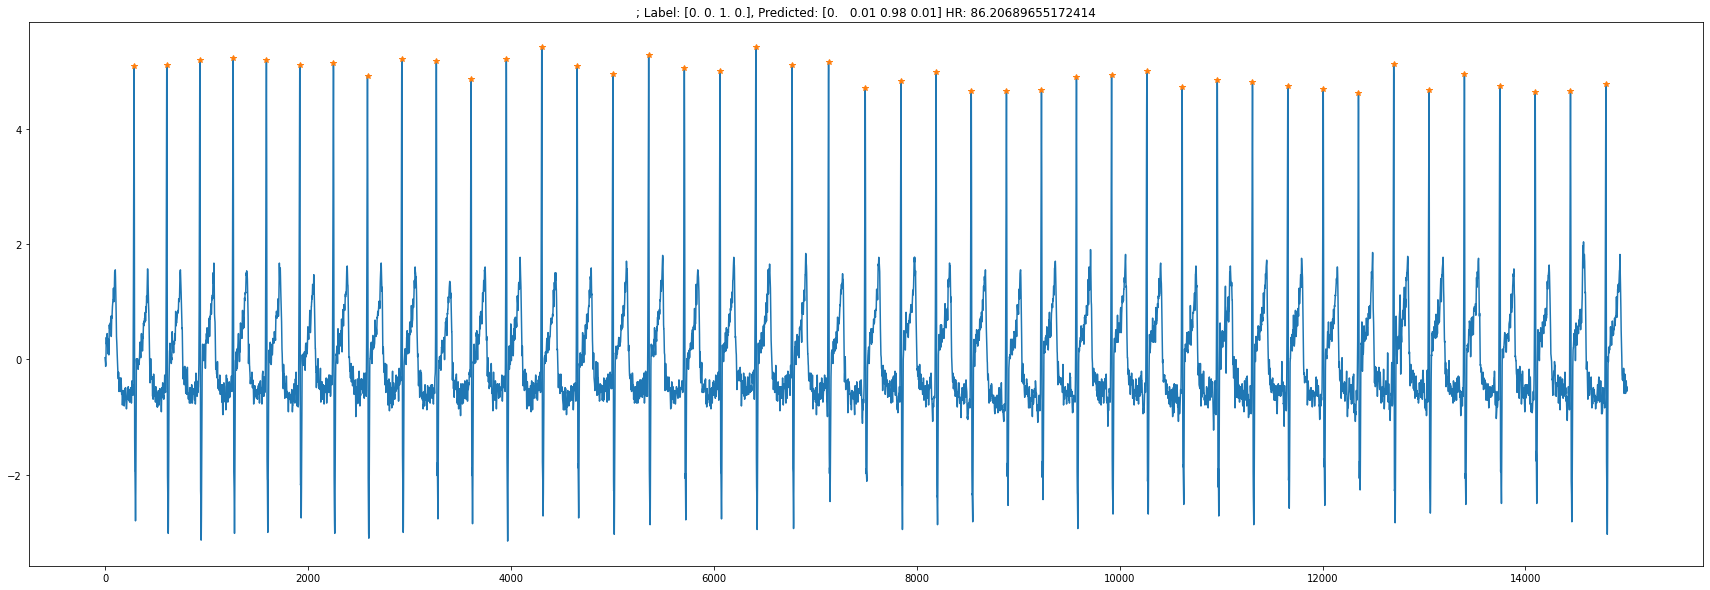

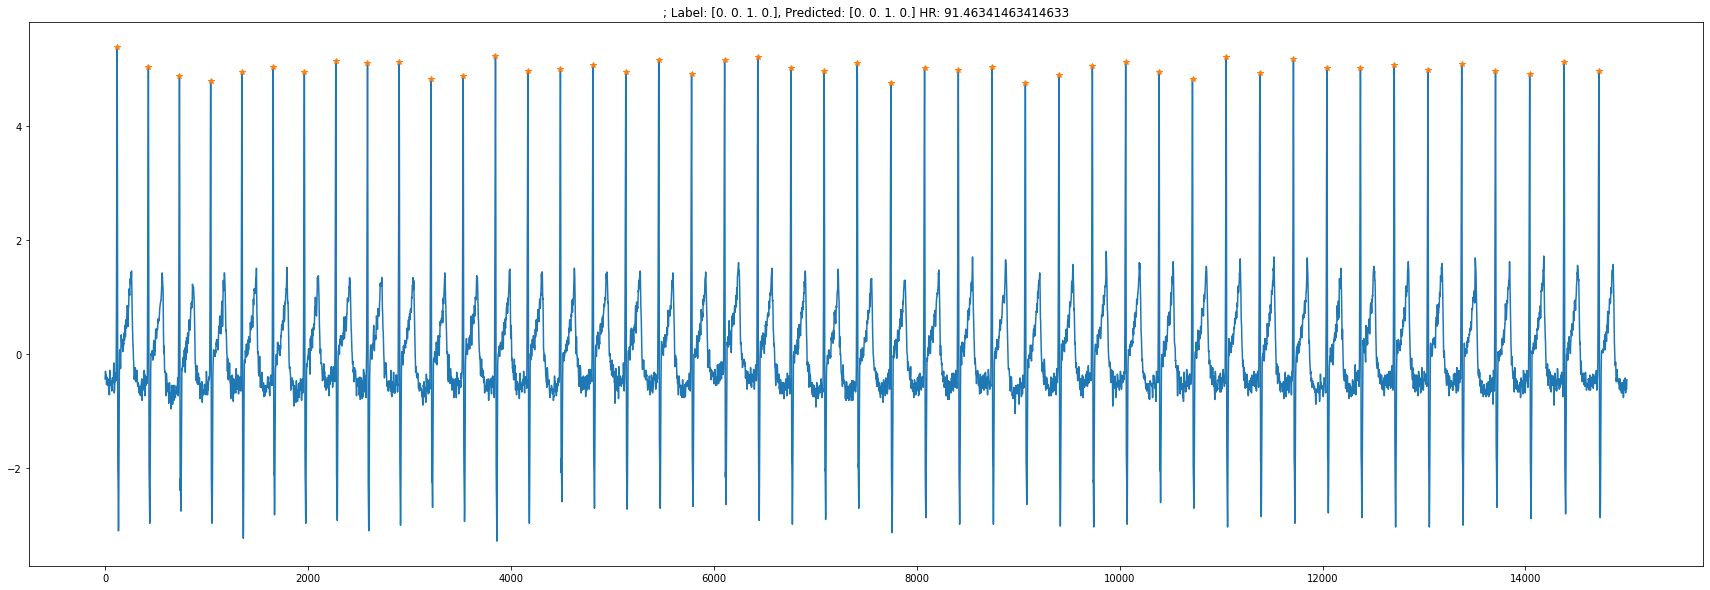

In [20]:
for i in range(N):
    
    #apply preprocessing
    signal = prep.run(signals_best[i],np.array([1]),label_process=False)
    signal = signal.reshape(-1)
    
    #find heart rate
    rr = peak_finder.find_peaks_abp(signal, threshold=4)  #christov_segmenter(signal=signals_worst[i], sampling_rate=125)
    if rr.shape[0]>5:
        HR = np.median(np.diff(rr))
        HR = 60/(HR/500)
    else:
        HR = -1
    
    
    
    fig = plt.figure(figsize=(30,10))
    plt.plot(signal)
    plt.plot(rr,signal[rr],'*')
    plt.title(f'; Label: {labels_best[i,:]}, Predicted: {np.round(preds_best[i,:],2)} HR: {HR}')
    plt.show()
    